In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import classification_report

In [61]:
np.random.seed(0) #for reproducibility

In [62]:
dog_whisker_length = np.random.normal(loc=5,scale=1,size=100);
dog_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=100);

In [63]:
cat_whisker_length = np.random.normal(loc=8,scale=1,size=100);
cat_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=100);

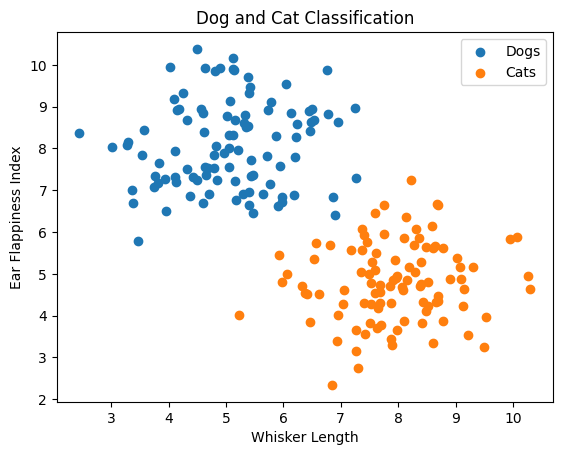

In [35]:
plt.scatter(dog_whisker_length,dog_ear_flappiness_index, label= 'Dogs');
plt.scatter(cat_whisker_length,cat_ear_flappiness_index, label= 'Cats');
plt.xlabel('Whisker Length');
plt.ylabel('Ear Flappiness Index');
plt.title('Dog and Cat Classification');
plt.legend();
plt.show();

In [64]:
#prepare data for algorithm
# transforming two array to array with(x,y) form
dogs_data = np.vstack((dog_whisker_length,dog_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length,cat_ear_flappiness_index)).T
data = np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))

In [88]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)


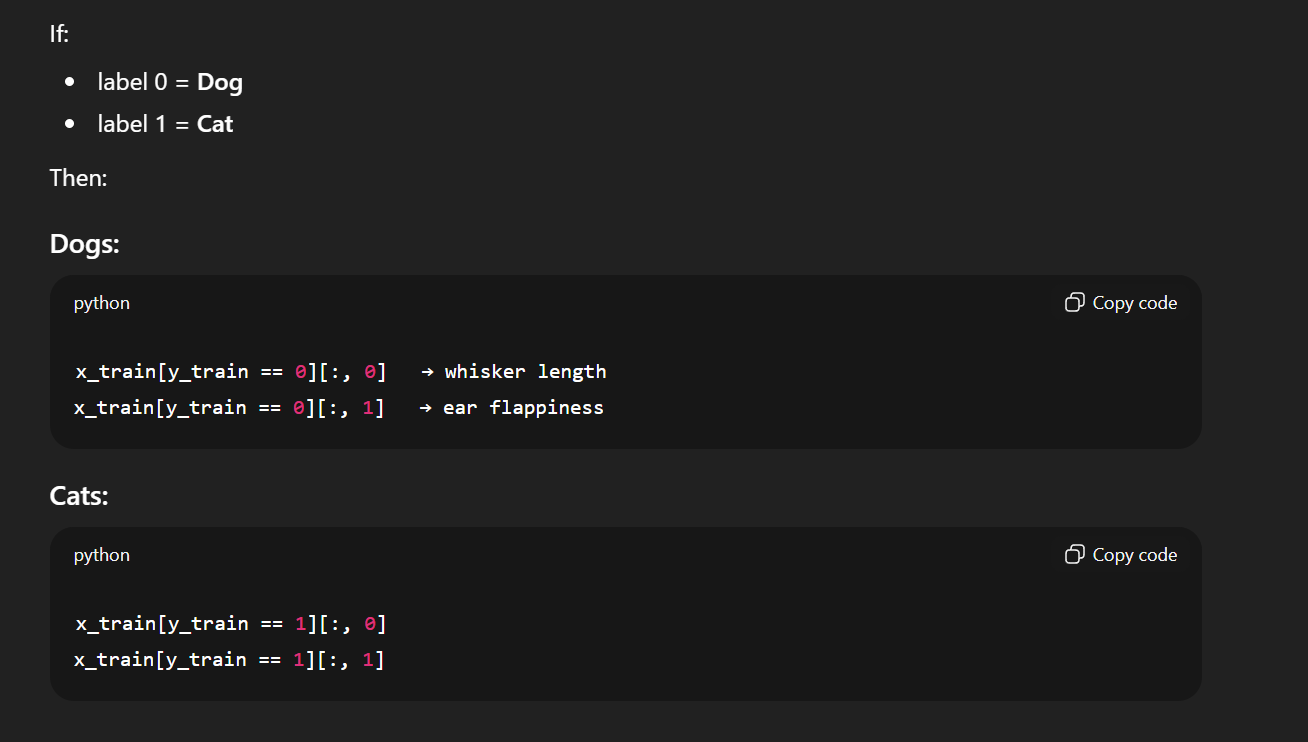

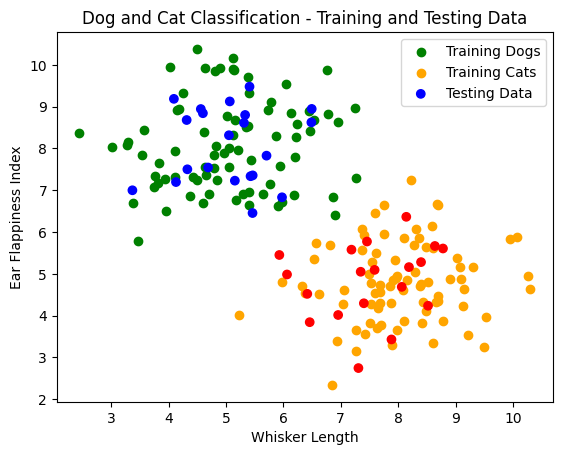

In [89]:
plt.scatter(
    x_train[y_train == 0][:, 0],
    x_train[y_train == 0][:, 1],
    label='Training Dogs',
    color='Green'
)

plt.scatter(
    x_train[y_train == 1][:, 0],
    x_train[y_train == 1][:, 1],
    label='Training Cats',
    color='orange'
)

# Test data (colored by label)
plt.scatter(
    x_test[:, 0],
    x_test[:, 1],
    c=y_test,
    cmap='bwr',
    label='Testing Data'
)

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog and Cat Classification - Training and Testing Data')
plt.legend()
plt.show()


In [90]:
# error on theta , theta0 =  (Q1x1+Q2x2+Q0= 0) line close to prefect hypothese
def compute_error(data_dogs,data_cats,theta, theta0):
  error =0
  for i in data_dogs:
    if np.dot(theta,i)+theta0 <= 0:
      error += 1
  for i in data_cats:
    if np.dot(theta,i)+theta0 >= 0:
      error += 1
  return error

In [91]:
# finding best line equation which tell us it dog or cat (d is feature vector(demintion))
def random_linear_classifier(data_dogs,data_cats,k,d):
  best_error = float('inf')
  best_theta = None
  best_theta0 = None
  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dogs,data_cats,theta,theta0)
    if error < best_error:
      best_error = error
      best_theta = theta
      best_theta0 = theta0
  return best_theta, best_theta0 , best_error

In [114]:
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))

            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(
                X_train_fold[y_train_fold == 0],
                X_train_fold[y_train_fold == 1],
                k, d
            )

            errors.append(
                compute_error(
                    X_val_fold[y_val_fold == 0],
                    X_val_fold[y_val_fold == 1],
                    best_theta_fold,
                    best_theta0_fold
                )
            )

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [1, 10, 100, 200]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k: {best_k}")


Best value of k: 100


In [92]:
dogs_data


array([[ 6.76405235,  9.8831507 ],
       [ 5.40015721,  6.65224094],
       [ 5.97873798,  6.729515  ],
       [ 7.2408932 ,  8.96939671],
       [ 6.86755799,  6.82687659],
       [ 4.02272212,  9.94362119],
       [ 5.95008842,  7.58638102],
       [ 4.84864279,  7.25254519],
       [ 4.89678115,  9.92294203],
       [ 5.4105985 ,  9.48051479],
       [ 5.14404357,  9.86755896],
       [ 6.45427351,  8.90604466],
       [ 5.76103773,  7.13877431],
       [ 5.12167502,  9.91006495],
       [ 5.44386323,  7.73199663],
       [ 5.33367433,  8.8024564 ],
       [ 6.49407907,  8.94725197],
       [ 4.79484174,  7.84498991],
       [ 5.3130677 ,  8.61407937],
       [ 4.14590426,  8.92220667],
       [ 2.44701018,  8.37642553],
       [ 5.6536186 ,  6.90059921],
       [ 5.8644362 ,  8.29823817],
       [ 4.25783498,  9.3263859 ],
       [ 7.26975462,  7.30543214],
       [ 3.54563433,  7.85036546],
       [ 5.04575852,  7.56484645],
       [ 4.81281615,  9.84926373],
       [ 6.53277921,

In [115]:
# Run random linear linear Classifier algo
k =100 #Number of iteration
d = 2 #Number of features
best_theta , best_theta0, train_error = random_linear_classifier(x_train[y_train==0],x_train[y_train==1],k,d)

In [118]:
print(best_theta)
print(best_theta0)

[-0.44321395  0.36868445]
0.750742686748393


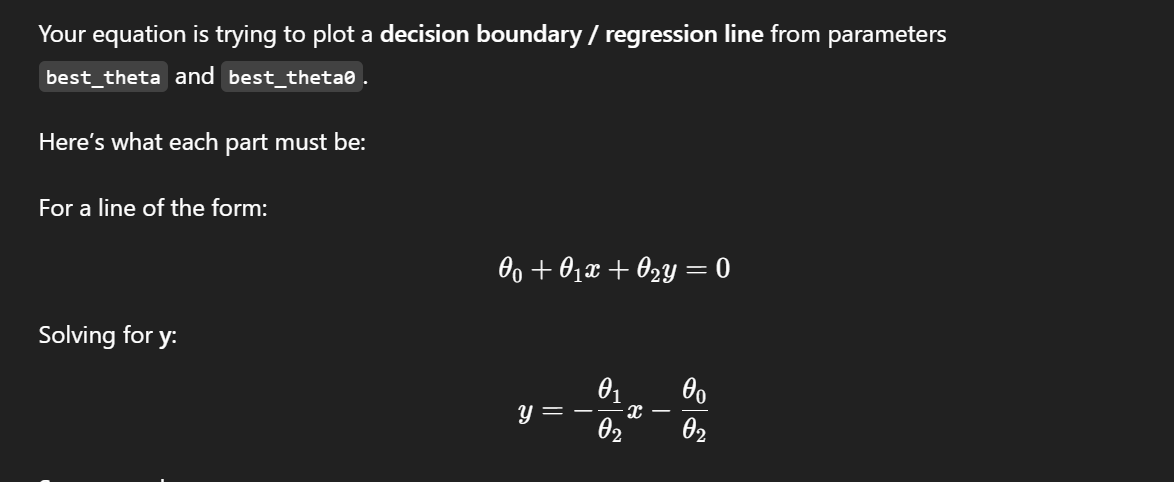

In [119]:
x_vals = np.linspace(2,10,100)
y_vals = -(best_theta[0]/best_theta[1])*x_vals-(best_theta0/best_theta[1])

Q0 =

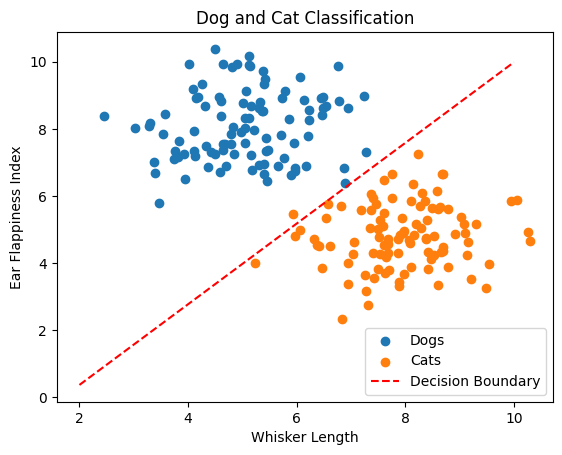

In [120]:
from matplotlib.lines import lineStyles
plt.scatter(dog_whisker_length,dog_ear_flappiness_index, label= 'Dogs');
plt.scatter(cat_whisker_length,cat_ear_flappiness_index, label= 'Cats');
plt.plot(x_vals,y_vals,color='red',linestyle = '--',label = 'Decision Boundary')
plt.xlabel('Whisker Length');
plt.ylabel('Ear Flappiness Index');
plt.title('Dog and Cat Classification');
plt.legend();
plt.show();

In [121]:
print("Training Error:",train_error)

Training Error: 0


In [122]:
test_error = compute_error(x_test[y_test==0],x_test[y_test==1],best_theta,best_theta0)
print(test_error)

1


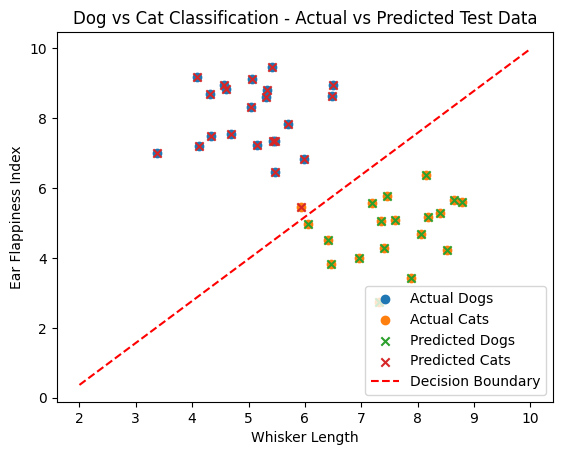

In [123]:
# Re-initialize x_test and y_test to ensure correct dimensions for plotting
# This assumes 'data' and 'labels' are correctly defined from previous cells.
from sklearn.model_selection import train_test_split
x_train_temp, x_test, y_train_temp, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Plot the actual test data and predicted test data
# Store the original x_test data before it's overwritten in the loop
original_x_test = x_test.copy()

plt.scatter(original_x_test[y_test == 0][:, 0], original_x_test[y_test == 0][:, 1], label='Actual Dogs')
plt.scatter(original_x_test[y_test == 1][:, 0], original_x_test[y_test == 1][:, 1], label='Actual Cats')

# Predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x_point in enumerate(original_x_test): # Use a different variable name for the loop
    if np.dot(best_theta, x_point) + best_theta0 > 0:
        predicted_labels[i] = 1

# Plot predicted test data points
plt.scatter(original_x_test[predicted_labels == 0][:, 0],
            original_x_test[predicted_labels == 0][:, 1],
            marker='x',
            label='Predicted Dogs')

plt.scatter(original_x_test[predicted_labels == 1][:, 0],
            original_x_test[predicted_labels == 1][:, 1],
            marker='x',
            label='Predicted Cats')

# Plot decision boundary
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()
